In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

### Reading main datasets 

In [2]:
data_frames = {}
for file in os.listdir('./data/'):
     year = str(file).split('_')[-2]
     path = os.path.join('data',file,file+'.csv')
     df = pd.read_csv(path, delimiter = ',', parse_dates=[0], infer_datetime_format=True, na_values='0', header = None)
     print(path)
     data_frames['df_'+year] = df

C:\Users\lluis\AppData\Local\Temp\ipykernel_16420\3232558894.py:5: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df = pd.read_csv(path, delimiter = ',', parse_dates=[0], infer_datetime_format=True, na_values='0', header = None)


data\dsc_fc_summed_spectra_2016_v01\dsc_fc_summed_spectra_2016_v01.csv


C:\Users\lluis\AppData\Local\Temp\ipykernel_16420\3232558894.py:5: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df = pd.read_csv(path, delimiter = ',', parse_dates=[0], infer_datetime_format=True, na_values='0', header = None)


data\dsc_fc_summed_spectra_2017_v01\dsc_fc_summed_spectra_2017_v01.csv


C:\Users\lluis\AppData\Local\Temp\ipykernel_16420\3232558894.py:5: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df = pd.read_csv(path, delimiter = ',', parse_dates=[0], infer_datetime_format=True, na_values='0', header = None)


data\dsc_fc_summed_spectra_2018_v01\dsc_fc_summed_spectra_2018_v01.csv


C:\Users\lluis\AppData\Local\Temp\ipykernel_16420\3232558894.py:5: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df = pd.read_csv(path, delimiter = ',', parse_dates=[0], infer_datetime_format=True, na_values='0', header = None)


data\dsc_fc_summed_spectra_2019_v01\dsc_fc_summed_spectra_2019_v01.csv


C:\Users\lluis\AppData\Local\Temp\ipykernel_16420\3232558894.py:5: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df = pd.read_csv(path, delimiter = ',', parse_dates=[0], infer_datetime_format=True, na_values='0', header = None)


data\dsc_fc_summed_spectra_2020_v01\dsc_fc_summed_spectra_2020_v01.csv


C:\Users\lluis\AppData\Local\Temp\ipykernel_16420\3232558894.py:5: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df = pd.read_csv(path, delimiter = ',', parse_dates=[0], infer_datetime_format=True, na_values='0', header = None)


data\dsc_fc_summed_spectra_2021_v01\dsc_fc_summed_spectra_2021_v01.csv


C:\Users\lluis\AppData\Local\Temp\ipykernel_16420\3232558894.py:5: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df = pd.read_csv(path, delimiter = ',', parse_dates=[0], infer_datetime_format=True, na_values='0', header = None)


data\dsc_fc_summed_spectra_2022_v01\dsc_fc_summed_spectra_2022_v01.csv


In [3]:
df16, df17,df18,df19,df20,df21,df22 = data_frames['df_2016'], data_frames['df_2017'], data_frames['df_2018'], data_frames['df_2019'], data_frames['df_2020'], data_frames['df_2021'], data_frames['df_2022']
df_final = pd.concat([df16,df17,df18,df19,df20,df21,df22])

In [4]:
df_final.rename({0:'date',1:'x',2:'y',3:'z'},inplace = True,axis =1)

### Reading indexs dataframe 

In [8]:
ind = pd.read_csv('./kpg.txt', delimiter=' ')
ind_filter = ind[(ind['YYYY']>=2016) & (ind['YYYY']<=2022)]
ind_filter.rename({'hh.h':'h'},axis=1,inplace = True)
ind_filter.head()

C:\Users\lluis\AppData\Local\Temp\ipykernel_16420\2585190920.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ind_filter.rename({'hh.h':'h'},axis=1,inplace = True)


,YYYY,MM,DD,h,hh._m,days,days_m,Kp,ap,D
245448,2016,1,1,0.0,1.5,30681.000,30681.0625,6.000,80,1
245449,2016,1,1,3.0,4.5,30681.125,30681.1875,5.333,56,1
245450,2016,1,1,6.0,7.5,30681.250,30681.3125,5.000,48,1
245451,2016,1,1,9.0,10.5,30681.375,30681.4375,3.333,18,1
245452,2016,1,1,12.0,13.5,30681.500,30681.5625,1.667,6,1


## Checking nulls 

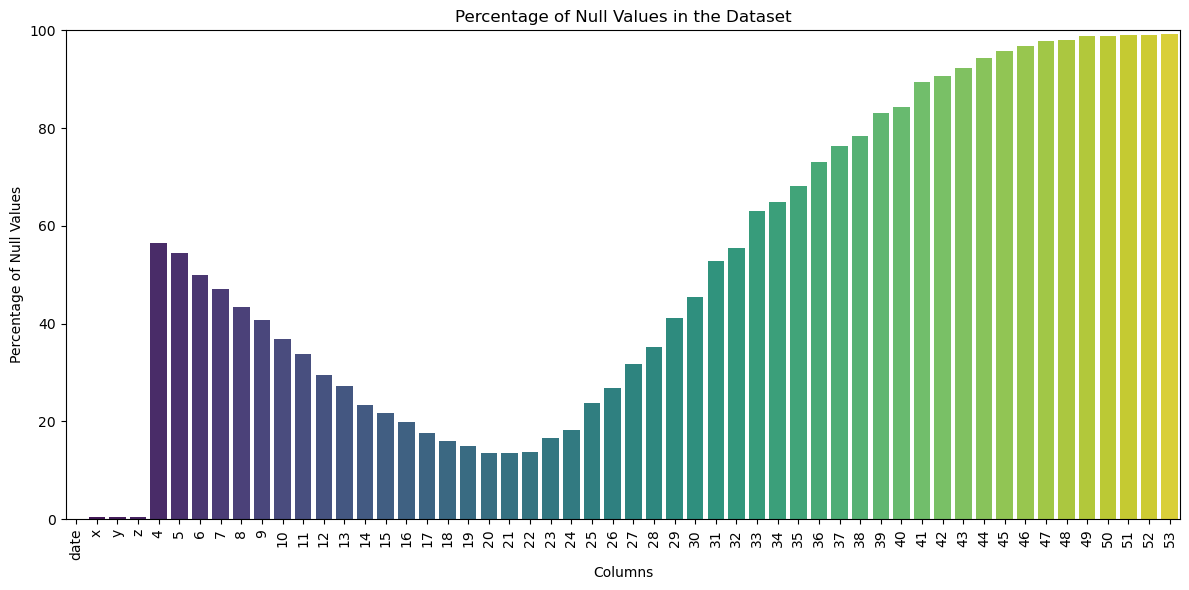

In [5]:
null_percentage = (df_final.isnull().sum() / len(df_final)) * 100

# Create a bar plot of null value percentages
plt.figure(figsize=(12, 6))  # Adjust the figure size as needed
ax = sns.barplot(x=null_percentage.index, y=null_percentage.values, palette="viridis")
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.xlabel("Columns")
plt.ylabel("Percentage of Null Values")
plt.title("Percentage of Null Values in the Dataset")

# Set the y-axis scale from 0 to 100
plt.ylim(0, 100)

plt.tight_layout()

# Show the plot
plt.show()

In [6]:
for k in data_frames:
    num_nulls = data_frames[k].isnull().sum().sum()
    print(k,'has a total of',num_nulls/data_frames[k].shape[0],'% (',num_nulls,') nulls')

df_2016 has a total of 30.86239777213762 % ( 8755045 ) nulls
df_2017 has a total of 30.70994101978691 % ( 16141145 ) nulls
df_2018 has a total of 31.242830280011916 % ( 16781149 ) nulls
df_2019 has a total of 31.24171738451935 % ( 8007877 ) nulls
df_2020 has a total of 28.850437656305825 % ( 12920380 ) nulls
df_2021 has a total of 23.672530441400305 % ( 12442282 ) nulls
df_2022 has a total of 20.29900494672755 % ( 10669157 ) nulls


## Merging dataframes

In [7]:
# df_final['date'] = pd.to_datetime(df_final['date'])

# # Calculate the time interval (90 minutes) in seconds
# interval = pd.Timedelta(minutes=180).total_seconds()

# # Create a custom grouping column based on time intervals
# df_final['group'] = (df_final['date'].sub(df_final['date'].min()).dt.total_seconds() / interval).astype(int)

# # Group the DataFrame by the custom 'group' column and calculate the mean for each group
# df_grouped = df_final.groupby('group').mean()

# # Reset the index to have the 'group' as a regular column again if needed
# df_grouped.reset_index(inplace=True)

# # Display the resulting DataFrame
# df_grouped

In [19]:
df_grouped

date         x         y          z          4  \
YYYY MM DD h                                                                  
2016 1  1  0  2016-01-01 00:29:30  5.733193 -2.296756 -13.282797        NaN   
           1  2016-01-01 01:29:30  4.668200 -1.917471 -12.976817        NaN   
           2  2016-01-01 02:29:30  2.898088  0.470586 -13.237948        NaN   
           3  2016-01-01 03:29:30  3.107440  0.077172 -12.819543        NaN   
           4  2016-01-01 04:29:30  3.387239 -2.777962 -11.102431        NaN   
...                           ...       ...       ...        ...        ...   
2022 12 31 19 2022-12-31 19:29:30 -4.473374  1.519250   0.830399  29.784907   
           20 2022-12-31 20:29:30 -3.290436  1.964028  -2.929503  21.858617   
           21 2022-12-31 21:29:30 -4.446037  0.635658  -1.558618  34.786600   
           22 2022-12-31 22:29:30 -3.406209  2.366158  -0.735159  25.451334   
           23 2022-12-31 23:29:30 -4.162362  2.590116   1.043677  22.319376   

                      5         6          7          8         9  ...  \
YYYY MM DD h                                                       ...   
2016 1  1  0        NaN       NaN        NaN        NaN       NaN  ...   
           1        NaN       NaN        NaN        NaN       NaN  ...   
           2        NaN       NaN        NaN        NaN       NaN  ...   
           3        NaN       NaN        NaN        NaN       NaN  ...   
           4        NaN       NaN        NaN        NaN       NaN  ...   
...                 ...       ...        ...        ...       ...  ...   
2022 12 31 19  0.231726  0.898599   4.807348  16.118624  0.240415  ...   
           20  0.231726  1.168325  21.257894  10.280048  0.288547  ...   
           21  0.231726  0.603541   4.284218  17.821019  0.231726  ...   
           22  0.231726  0.825247   5.599556  10.664564  0.282697  ...   
           23  0.231726  0.297412   1.562566   7.614297  0.231726  ...   

                     44          45       46  47  48  49  50  51  52  53  
YYYY MM DD h                                                              
2016 1  1  0        NaN         NaN      NaN NaN NaN NaN NaN NaN NaN NaN  
           1        NaN         NaN      NaN NaN NaN NaN NaN NaN NaN NaN  
           2        NaN         NaN      NaN NaN NaN NaN NaN NaN NaN NaN  
           3        NaN         NaN      NaN NaN NaN NaN NaN NaN NaN NaN  
           4        NaN         NaN      NaN NaN NaN NaN NaN NaN NaN NaN  
...                 ...         ...      ...  ..  ..  ..  ..  ..  ..  ..  
2022 12 31 19  338.5740  285.707800  381.276 NaN NaN NaN NaN NaN NaN NaN  
           20  309.4500  294.706429      NaN NaN NaN NaN NaN NaN NaN NaN  
           21  364.7040         NaN      NaN NaN NaN NaN NaN NaN NaN NaN  
           22  334.7145         NaN      NaN NaN NaN NaN NaN NaN NaN NaN  
           23  335.6805  277.562000      NaN NaN NaN NaN NaN NaN NaN NaN  

[51504 rows x 54 columns]

In [10]:
df_final['YYYY'] = df_final['date'].dt.year
df_final['MM'] = df_final['date'].dt.month
df_final['DD'] = df_final['date'].dt.day
df_final['h'] = df_final['date'].dt.hour

In [ ]:
def truncateHour(x):
    if <=3:
        return 0
    elif <

In [11]:
df_grouped = df_final.groupby(['YYYY','MM','DD','h']).mean()
# df_grouped['h'].apply(truncateHour)

In [16]:
merged_df = pd.merge(df_grouped, ind_filter, on=['YYYY', 'DD', 'MM', 'h'], how='inner')
merged_df.head()

In [18]:
merged_df.head()

,YYYY,DD,MM,h,date,x,y,z,4,5,...,50,51,52,53,hh._m,days,days_m,Kp,ap,D
0,2016,1,1,0,2016-01-01 00:29:30,5.733193,-2.296756,-13.282797,NaN,NaN,...,NaN,NaN,NaN,NaN,1.5,30681.000,30681.0625,6.000,80,1
1,2016,1,1,3,2016-01-01 03:29:30,3.107440,0.077172,-12.819543,NaN,NaN,...,NaN,NaN,NaN,NaN,4.5,30681.125,30681.1875,5.333,56,1
2,2016,1,1,6,2016-01-01 06:29:30,3.159132,-5.322844,-8.843637,143.819967,103.094027,...,156.671133,137.356233,158.362867,144.435267,7.5,30681.250,30681.3125,5.000,48,1
3,2016,1,1,9,2016-01-01 09:29:30,6.226548,-7.963963,0.655614,NaN,NaN,...,NaN,NaN,NaN,NaN,10.5,30681.375,30681.4375,3.333,18,1
4,2016,1,1,12,2016-01-01 12:29:30,5.404421,-7.380343,-0.280866,NaN,NaN,...,NaN,NaN,NaN,NaN,13.5,30681.500,30681.5625,1.667,6,1


In [ ]:
merged_df= merged_df.drop(['hh._m','days','days_m'],axis=1)